In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Sahib Alizada\Desktop\Project 1\Data\Raw Data\ecommerce.csv")

In [4]:
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,4/14/2023
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,7/30/2023
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,9/17/2023
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,6/21/2023
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,10/29/2024


In [5]:
df.tail()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
49995,49996,Isabella Rodriguez,53,India,Electronics,140.09,UPI,8/7/2024
49996,49997,Emma Hall,30,France,Home & Kitchen,815.31,Cash on Delivery,2/7/2025
49997,49998,Isabella Allen,50,Australia,Beauty,535.77,UPI,8/11/2023
49998,49999,Olivia Clark,48,Australia,Grocery,370.99,Cash on Delivery,1/2/2025
49999,50000,Olivia Harris,70,Canada,Sports,577.66,Credit Card,6/3/2024


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [8]:
df.shape

(50000, 8)

In [9]:
df.isnull().sum()

Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# eger dublicat olsa idi
# df=df.drop_duplicates()

In [12]:
df["Purchase_Amount"].describe()

count    50000.000000
mean       503.159793
std        286.563558
min          5.040000
25%        255.450000
50%        503.110000
75%        751.162500
max        999.980000
Name: Purchase_Amount, dtype: float64

In [14]:
df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    50000 non-null  int64         
 1   User_Name         50000 non-null  object        
 2   Age               50000 non-null  int64         
 3   Country           50000 non-null  object        
 4   Product_Category  50000 non-null  object        
 5   Purchase_Amount   50000 non-null  float64       
 6   Payment_Method    50000 non-null  object        
 7   Transaction_Date  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.1+ MB


In [18]:
# Kategorik sütunları standartlaşdırılır.

In [17]:
df["Payment_Method"] = df["Payment_Method"].str.lower().str.strip()
df["Country"] = df["Country"].str.strip()
df["Product_Category"] = df["Product_Category"].str.strip()

In [19]:
q1 = df["Purchase_Amount"].quantile(0.25)
q3 = df["Purchase_Amount"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df[(df["Purchase_Amount"] < lower) | (df["Purchase_Amount"] > upper)].shape


(0, 8)

<Axes: xlabel='Purchase_Amount'>

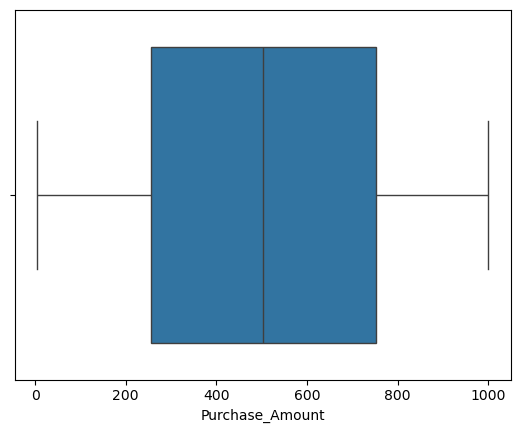

In [20]:
import seaborn as sns
sns.boxplot(x=df["Purchase_Amount"])

In [21]:
# Feature Engineering

In [23]:
df["month"]=df["Transaction_Date"].dt.month
df["year"] = df["Transaction_Date"].dt.year

In [25]:
df.groupby("Country")["Purchase_Amount"].mean().sort_values(ascending=False).head(5)

Country
USA          510.387672
France       509.861644
Brazil       506.727474
Australia    504.495817
Japan        502.482298
Name: Purchase_Amount, dtype: float64

In [26]:
df.groupby("Product_Category")["Purchase_Amount"].sum().sort_values(ascending=False)

Product_Category
Sports            3195335.90
Toys              3185652.36
Books             3181897.30
Clothing          3171225.96
Electronics       3133965.04
Grocery           3123579.52
Home & Kitchen    3108945.78
Beauty            3057387.79
Name: Purchase_Amount, dtype: float64

In [27]:
df["Payment_Method"].value_counts()

Payment_Method
upi                 8477
cash on delivery    8434
debit card          8355
credit card         8310
paypal              8250
net banking         8174
Name: count, dtype: int64

In [28]:
df.groupby("month")["Purchase_Amount"].sum()

month
1     2157491.06
2     1965012.10
3     2094476.66
4     2094031.24
5     2121001.16
6     2044087.84
7     2170669.46
8     2105853.84
9     2064806.17
10    2126180.46
11    2081675.72
12    2132703.94
Name: Purchase_Amount, dtype: float64